In [1]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import netCDF4
import h5py
import datetime as dt
import pyproj

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers.convolutional import Conv3D
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

from tqdm import tqdm

from pyproj import Proj, transform
from shapely.geometry import Polygon
import cartopy.crs as ccrs
import torch

from scipy.interpolate import griddata

import cdsapi
import xarray as xr
from urllib.request import urlopen

from urllib.request import urlretrieve

import pickle

%load_ext autoreload
%autoreload 2

from functions import *
from torch_model import *

Num GPUs Available:  1


## Read sea ice OBSERVATION data

In [2]:
### Create CNN input datasets

## Read sea ice movement
try:
    nc.close()
except:
    pass

data_path = "D:\\PINN\\data"
# data_path = "C:\\Users\\yok223\\Research\\PINN\\data"
for year in [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]: #[2013, 2014, 2015, 2016, 2017]: #
    months = [1,2,3,4,5,6,7,8,9,10, 11, 12] #np.arange(1,13)
    first = True

    ds = retrieve_ERA5(year)

    for datatype in ["entire"]:
        for month in months:
            d1 = int(dt.datetime(year, month, 1).strftime('%j')) - 1
            if month == 12:
                d2 = int(dt.datetime(year, 12, 31).strftime('%j')) - 2
            else:
                d2 = int(dt.datetime(year, month+1, 1).strftime('%j')) - 1

            n_samples = np.arange(d1, d2, 1)
            xx, yy, train_input, train_output, valid = make_dataset(year, n_samples, ds, datatype = datatype)
            train_save = [xx, yy, train_input, train_output, n_samples[valid]]

            # Open a file and use dump()
            with open(data_path + '/train_{0}_{1}_v7.pkl'.format(datatype, dt.datetime(year, month, 1).strftime('%Y%m')), 'wb') as file:
                # A new file will be created
                pickle.dump(train_save, file)

            print(dt.datetime(year, month, 1).strftime('%Y%m'))

2023-10-02 08:44:42,513 INFO Welcome to the CDS
2023-10-02 08:44:42,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-10-02 08:44:42,760 INFO Request is completed
31it [00:56,  1.81s/it]


201301


28it [00:48,  1.72s/it]


201302


31it [00:53,  1.72s/it]


201303


30it [00:51,  1.72s/it]


201304


31it [00:53,  1.74s/it]


201305


30it [00:53,  1.80s/it]


201306


31it [00:53,  1.74s/it]


201307


31it [00:52,  1.69s/it]


201308


30it [00:51,  1.71s/it]


201309


31it [00:52,  1.71s/it]


201310


30it [00:51,  1.73s/it]


201311


29it [00:49,  1.71s/it]


201312


2023-10-02 08:56:47,736 INFO Welcome to the CDS
2023-10-02 08:56:47,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-10-02 08:56:48,053 INFO Request is queued
2023-10-02 08:56:49,166 INFO Request is running
2023-10-02 08:58:03,903 INFO Request is completed
31it [00:52,  1.70s/it]


201401


28it [00:47,  1.69s/it]


201402


31it [00:52,  1.70s/it]


201403


30it [00:51,  1.71s/it]


201404


31it [00:52,  1.69s/it]


201405


30it [00:51,  1.70s/it]


201406


31it [00:52,  1.70s/it]


201407


31it [00:52,  1.70s/it]


201408


30it [00:50,  1.69s/it]


201409


31it [00:52,  1.71s/it]


201410


30it [00:51,  1.71s/it]


201411


29it [00:49,  1.72s/it]


201412


2023-10-02 09:09:36,729 INFO Welcome to the CDS
2023-10-02 09:09:36,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-10-02 09:09:36,960 INFO Request is queued
2023-10-02 09:09:38,072 INFO Request is running
2023-10-02 09:10:52,859 INFO Request is completed
31it [00:53,  1.72s/it]


201501


28it [00:48,  1.73s/it]


201502


31it [00:53,  1.74s/it]


201503


30it [00:52,  1.74s/it]


201504


31it [00:53,  1.72s/it]


201505


30it [00:50,  1.68s/it]


201506


31it [00:51,  1.68s/it]


201507


31it [00:51,  1.68s/it]


201508


30it [00:50,  1.68s/it]


201509


31it [00:51,  1.67s/it]


201510


30it [00:50,  1.68s/it]


201511


29it [00:48,  1.66s/it]


201512


2023-10-02 09:22:15,328 INFO Welcome to the CDS
2023-10-02 09:22:15,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-10-02 09:22:15,580 INFO Request is queued
2023-10-02 09:22:16,680 INFO Request is running
2023-10-02 09:23:31,445 INFO Request is completed
31it [00:52,  1.68s/it]


201601


29it [00:48,  1.69s/it]


201602


31it [00:51,  1.68s/it]


201603


30it [00:50,  1.68s/it]


201604


31it [00:51,  1.68s/it]


201605


30it [00:50,  1.68s/it]


201606


31it [00:52,  1.69s/it]


201607


31it [00:52,  1.69s/it]


201608


30it [00:50,  1.68s/it]


201609


31it [00:52,  1.68s/it]


201610


30it [00:50,  1.68s/it]


201611


29it [00:48,  1.68s/it]


201612


2023-10-02 09:35:15,710 INFO Welcome to the CDS
2023-10-02 09:35:15,710 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-10-02 09:35:15,969 INFO Request is queued
2023-10-02 09:35:17,095 INFO Request is running
2023-10-02 09:36:31,912 INFO Request is completed
31it [00:52,  1.69s/it]


201701


28it [00:47,  1.71s/it]


201702


31it [00:52,  1.68s/it]


201703


30it [00:50,  1.68s/it]


201704


31it [00:53,  1.72s/it]


201705


30it [00:51,  1.70s/it]


201706


31it [00:51,  1.68s/it]


201707


31it [00:52,  1.69s/it]


201708


30it [00:50,  1.68s/it]


201709


31it [00:52,  1.68s/it]


201710


30it [00:50,  1.68s/it]


201711


29it [00:49,  1.72s/it]


201712


2023-10-02 09:48:03,701 INFO Welcome to the CDS
2023-10-02 09:48:03,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-10-02 09:48:03,967 INFO Request is queued
2023-10-02 09:48:05,081 INFO Request is running
2023-10-02 09:49:19,883 INFO Request is completed
31it [00:53,  1.71s/it]


201801


28it [00:47,  1.68s/it]


201802


31it [00:52,  1.69s/it]


201803


30it [00:51,  1.71s/it]


201804


31it [00:52,  1.69s/it]


201805


30it [00:50,  1.68s/it]


201806


31it [00:51,  1.67s/it]


201807


31it [00:51,  1.67s/it]


201808


30it [00:50,  1.68s/it]


201809


31it [00:52,  1.68s/it]


201810


30it [00:50,  1.68s/it]


201811


29it [00:48,  1.68s/it]


201812


2023-10-02 10:00:58,259 INFO Welcome to the CDS
2023-10-02 10:00:58,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-10-02 10:00:58,493 INFO Request is queued
2023-10-02 10:00:59,592 INFO Request is running
2023-10-02 10:02:14,307 INFO Request is completed
31it [00:52,  1.69s/it]


201901


28it [00:46,  1.67s/it]


201902


31it [00:52,  1.70s/it]


201903


30it [00:50,  1.68s/it]


201904


31it [00:52,  1.69s/it]


201905


30it [00:50,  1.68s/it]


201906


31it [00:52,  1.68s/it]


201907


31it [00:52,  1.69s/it]


201908


30it [00:50,  1.68s/it]


201909


31it [00:52,  1.68s/it]


201910


30it [00:50,  1.68s/it]


201911


29it [00:48,  1.68s/it]


201912


2023-10-02 10:14:04,592 INFO Welcome to the CDS
2023-10-02 10:14:04,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-10-02 10:14:04,774 INFO Request is queued
2023-10-02 10:14:05,872 INFO Request is running
2023-10-02 10:15:20,607 INFO Request is completed
31it [00:52,  1.68s/it]


202001


29it [00:48,  1.68s/it]


202002


31it [00:52,  1.69s/it]


202003


30it [00:50,  1.70s/it]


202004


31it [00:52,  1.69s/it]


202005


30it [00:50,  1.69s/it]


202006


31it [00:52,  1.69s/it]


202007


31it [00:52,  1.68s/it]


202008


30it [00:50,  1.68s/it]


202009


31it [00:52,  1.69s/it]


202010


30it [00:50,  1.69s/it]


202011


29it [00:48,  1.67s/it]


202012


2023-10-02 10:27:09,302 INFO Welcome to the CDS
2023-10-02 10:27:09,302 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-10-02 10:27:09,615 INFO Request is queued
2023-10-02 10:27:10,746 INFO Request is running
2023-10-02 10:28:25,521 INFO Request is completed
31it [00:53,  1.74s/it]


202101


28it [00:47,  1.68s/it]


202102


31it [00:52,  1.68s/it]


202103


30it [00:50,  1.68s/it]


202104


31it [00:52,  1.70s/it]


202105


30it [00:50,  1.69s/it]


202106


31it [00:52,  1.69s/it]


202107


31it [00:52,  1.69s/it]


202108


30it [00:50,  1.69s/it]


202109


31it [00:52,  1.69s/it]


202110


30it [00:50,  1.69s/it]


202111


29it [00:48,  1.68s/it]


202112


2023-10-02 10:40:26,760 INFO Welcome to the CDS
2023-10-02 10:40:26,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-10-02 10:40:27,028 INFO Request is queued
2023-10-02 10:40:28,145 INFO Request is running
2023-10-02 10:41:42,959 INFO Request is completed
31it [00:52,  1.69s/it]


202201


28it [00:47,  1.68s/it]


202202


31it [00:52,  1.68s/it]


202203


30it [00:50,  1.69s/it]


202204


31it [00:52,  1.69s/it]


202205


30it [00:50,  1.68s/it]


202206


31it [00:52,  1.69s/it]


202207


31it [00:52,  1.69s/it]


202208


30it [00:50,  1.69s/it]


202209


31it [00:57,  1.84s/it]


202210


30it [00:58,  1.95s/it]


202211


29it [00:54,  1.86s/it]


202212


## Read sea ice PHYSICAL HYCOM data

In [109]:
### Create CNN input datasets with physical HYCOM MODEL

## Read sea ice movement
try:
    nc.close()
except:
    pass

data_path = "D:\\PINN\\data"
# data_path = "C:\\Users\\yok223\\Research\\PINN\\data"
for year in [2019, 2020, 2021, 2022]:
    months = [1,2,3,4,5,6,7,8,9,10, 11, 12] #np.arange(1,13)
    first = True

    ds = retrieve_ERA5(year)

    for datatype in ["entire"]:
        for month in months:
            
            d1 = int(dt.datetime(year, month, 1).strftime('%j'))-1
            if month == 12:
                d2 = int(dt.datetime(year, 12, 31).strftime('%j'))
            else:
                d2 = int(dt.datetime(year, month+1, 1).strftime('%j'))-1
            
            n_samples = np.arange(d1, d2, 1)
            xx, yy, train_input, train_output, valid = make_hycom_dataset(int(year), str(int(month)).zfill(2), ds, w = 1, region = "NH")
            train_save = [xx, yy, train_input, train_output, n_samples[valid]]

            # Open a file and use dump()
            with open(data_path + '/train_physics_{0}_{1}_v1.pkl'.format(datatype, dt.datetime(year, month, 1).strftime('%Y%m')), 'wb') as file:
                # A new file will be created
                pickle.dump(train_save, file)

            print(dt.datetime(year, month, 1).strftime('%Y%m'))

2023-09-15 16:03:36,217 INFO Welcome to the CDS
2023-09-15 16:03:36,219 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-15 16:03:36,402 INFO Request is queued
2023-09-15 16:03:37,525 INFO Request is running
2023-09-15 16:04:52,353 INFO Request is completed
31it [01:08,  2.21s/it]


201901


28it [01:05,  2.33s/it]


201902


31it [00:54,  1.76s/it]


201903


30it [00:57,  1.91s/it]


201904


31it [00:59,  1.91s/it]


201905


30it [00:54,  1.81s/it]


201906


31it [00:56,  1.81s/it]


201907


31it [00:56,  1.83s/it]


201908


30it [00:56,  1.90s/it]


201909


31it [00:57,  1.87s/it]


201910


30it [00:55,  1.85s/it]


201911


31it [00:59,  1.93s/it]


201912


2023-09-15 16:20:47,252 INFO Welcome to the CDS
2023-09-15 16:20:47,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-15 16:20:47,391 INFO Request is queued
2023-09-15 16:20:48,509 INFO Request is running
2023-09-15 16:22:03,312 INFO Request is completed
31it [00:54,  1.77s/it]


202001


29it [00:51,  1.78s/it]


202002


31it [00:56,  1.81s/it]


202003


30it [00:53,  1.79s/it]


202004


31it [00:55,  1.78s/it]


202005


30it [00:53,  1.79s/it]


202006


31it [00:55,  1.80s/it]


202007


31it [00:54,  1.75s/it]


202008


30it [00:52,  1.76s/it]


202009


31it [00:54,  1.75s/it]


202010


30it [00:53,  1.79s/it]


202011


31it [00:54,  1.77s/it]


202012


2023-09-15 16:37:19,406 INFO Welcome to the CDS
2023-09-15 16:37:19,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-15 16:37:19,558 INFO Request is queued
2023-09-15 16:37:20,679 INFO Request is running
2023-09-15 16:38:35,526 INFO Request is completed
31it [00:56,  1.81s/it]


202101


28it [00:49,  1.77s/it]


202102


31it [00:55,  1.79s/it]


202103


30it [00:54,  1.81s/it]


202104


31it [00:55,  1.80s/it]


202105


30it [00:52,  1.75s/it]


202106


31it [00:54,  1.75s/it]


202107


31it [00:54,  1.77s/it]


202108


30it [01:47,  3.58s/it]


202109


31it [05:14, 10.15s/it]


202110


30it [00:53,  1.79s/it]


202111


31it [00:54,  1.77s/it]


202112


2023-09-15 17:05:04,839 INFO Welcome to the CDS
2023-09-15 17:05:04,840 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-15 17:05:04,956 INFO Request is queued
2023-09-15 17:05:06,072 INFO Request is running
2023-09-15 17:06:20,911 INFO Request is completed
31it [00:58,  1.88s/it]


202201


28it [00:50,  1.81s/it]


202202


31it [00:55,  1.79s/it]


202203


30it [00:54,  1.83s/it]


202204


31it [00:56,  1.83s/it]


202205


30it [00:54,  1.80s/it]


202206


31it [00:59,  1.93s/it]


202207


31it [01:00,  1.95s/it]


202208


30it [00:57,  1.92s/it]


202209


31it [01:00,  1.94s/it]


202210


30it [00:57,  1.93s/it]


202211


31it [00:57,  1.87s/it]


202212


## Read sea ice PHYSICAL HYCOM-CICE data

In [3]:
### Create CNN input datasets with physical HYCOM MODEL

## Read sea ice movement
try:
    nc.close()
except:
    pass

data_path = "D:\\PINN\\data"
# data_path = "C:\\Users\\yok223\\Research\\PINN\\data"
for year in [2019, 2020, 2021, 2022]:
    months = np.arange(1,13)
    first = True

    ds = retrieve_ERA5(year)

    for datatype in ["entire"]:
        for month in months:
            
            d1 = int(dt.datetime(year, month, 1).strftime('%j'))-1
            if month == 12:
                d2 = int(dt.datetime(year, 12, 31).strftime('%j'))
            else:
                d2 = int(dt.datetime(year, month+1, 1).strftime('%j'))-1
            
            n_samples = np.arange(d1, d2, 1)
            xx, yy, train_input, train_output, valid = make_cice_dataset(int(year), str(int(month)).zfill(2), ds, w = 1, region = "NH")
            train_save = [xx, yy, train_input, train_output, n_samples[valid]]

            # Open a file and use dump()
            with open(data_path + '/train_cice_{0}_{1}_v1.pkl'.format(datatype, dt.datetime(year, month, 1).strftime('%Y%m')), 'wb') as file:
                # A new file will be created
                pickle.dump(train_save, file)

            print(dt.datetime(year, month, 1).strftime('%Y%m'))

2023-09-20 16:57:37,251 INFO Welcome to the CDS
2023-09-20 16:57:37,251 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-20 16:57:37,478 INFO Request is completed
31it [06:09, 11.91s/it]


201901


28it [05:53, 12.61s/it]


201902


31it [06:43, 13.01s/it]


201903


30it [06:42, 13.42s/it]


201904


31it [06:53, 13.34s/it]


201905


30it [06:02, 12.08s/it]


201906


31it [06:15, 12.12s/it]


201907


31it [05:55, 11.46s/it]


201908


30it [05:40, 11.36s/it]


201909


31it [06:36, 12.80s/it]


201910


30it [06:31, 13.04s/it]


201911


31it [06:42, 13.00s/it]


201912


2023-09-20 18:15:02,962 INFO Welcome to the CDS
2023-09-20 18:15:02,971 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-20 18:15:03,342 INFO Request is queued
2023-09-20 18:15:04,459 INFO Request is running
2023-09-20 18:16:19,272 INFO Request is completed
31it [06:19, 12.25s/it]


202001


29it [05:49, 12.07s/it]


202002


31it [05:59, 11.60s/it]


202003


30it [06:51, 13.71s/it]


202004


31it [06:32, 12.67s/it]


202005


30it [06:26, 12.89s/it]


202006


31it [06:27, 12.51s/it]


202007


31it [06:16, 12.15s/it]


202008


30it [06:01, 12.04s/it]


202009


31it [06:00, 11.63s/it]


202010


30it [05:46, 11.55s/it]


202011


31it [05:48, 11.23s/it]


202012


2023-09-20 19:31:56,678 INFO Welcome to the CDS
2023-09-20 19:31:56,678 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-20 19:31:57,023 INFO Request is queued
2023-09-20 19:31:58,140 INFO Request is running
2023-09-20 19:33:12,915 INFO Request is completed
31it [05:49, 11.26s/it]


202101


28it [05:16, 11.29s/it]


202102


31it [05:49, 11.27s/it]


202103


30it [05:35, 11.17s/it]


202104


31it [05:45, 11.14s/it]


202105


30it [05:29, 10.97s/it]


202106


31it [05:39, 10.94s/it]


202107


31it [05:37, 10.89s/it]


202108


30it [05:29, 10.99s/it]


202109


31it [05:40, 10.98s/it]


202110


30it [05:29, 10.98s/it]


202111


31it [06:01, 11.67s/it]


202112


2023-09-20 20:42:27,391 INFO Welcome to the CDS
2023-09-20 20:42:27,392 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-20 20:42:27,676 INFO Request is completed
31it [06:30, 12.59s/it]


202201


28it [05:31, 11.83s/it]


202202


31it [06:27, 12.49s/it]


202203


30it [06:07, 12.26s/it]


202204


31it [06:14, 12.09s/it]


202205


30it [06:18, 12.62s/it]


202206


31it [06:29, 12.56s/it]


202207


31it [06:31, 12.63s/it]


202208


30it [06:19, 12.64s/it]


202209


31it [06:34, 12.72s/it]


202210


30it [06:26, 12.90s/it]


202211


31it [06:48, 13.18s/it]


202212


In [107]:
dt.datetime(year, 12, 31)

datetime.datetime(2018, 12, 31, 0, 0)

In [26]:
train_save = [xx, yy, train_input, train_output, n_samples[valid]]

with open(data_path + '/train_cice_{0}_{1}_v1.pkl'.format(datatype, dt.datetime(year, month, 1).strftime('%Y%m')), 'wb') as file:
    # A new file will be created
    pickle.dump(train_save, file)

In [9]:
%load_ext autoreload
%autoreload 2

from functions import *

xx, yy, train_input, train_output, valid = make_cice_dataset(int(year), str(int(month)).zfill(2), ds, w = 1, region = "NH")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


31it [04:42,  9.11s/it]


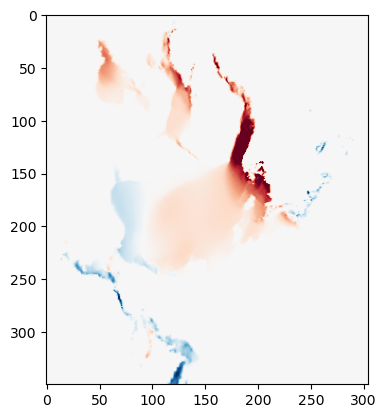

In [24]:
plt.imshow(train_input[10, :, :, 1], vmin=-1, vmax=1, cmap = "RdBu")

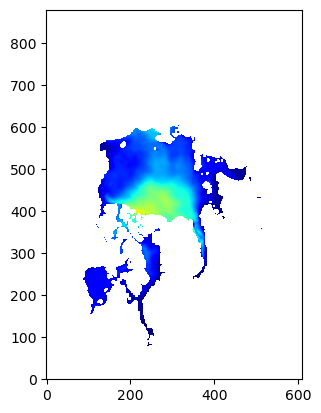

In [89]:
img = train_input[10, :, :, 3]
img[img == 0] = np.nan
plt.imshow(img, origin = "lower", cmap = "jet")

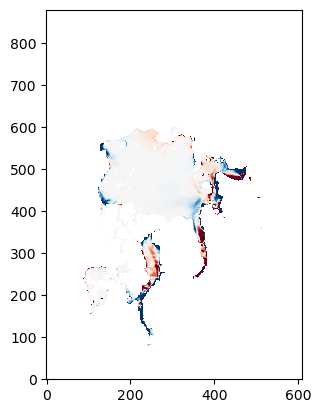

In [97]:
img = train_output[10, :, :, 2] - train_input[10, :, :, 2]
img[img == 0] = np.nan
plt.imshow(img, origin = "lower", vmin = -0.01, vmax = 0.01, cmap = "RdBu")

In [ ]:
img = train_output[10, :, :, 2] - train_input[10, :, :, 2]
img[img == 0] = np.nan
plt.imshow(img, origin = "lower", vmin = -0.01, vmax = 0.01, cmap = "RdBu")

In [34]:
glob.glob("D:\PINN\data/NH/HYCOM/2018/01/201801*.nc")

['D:\\PINN\\data/NH/HYCOM/2018/01\\20180101_dm-12km-NERSC-MODEL-TOPAZ4B-ARC-RAN.fv2.0.nc',
 'D:\\PINN\\data/NH/HYCOM/2018/01\\20180102_dm-12km-NERSC-MODEL-TOPAZ4B-ARC-RAN.fv2.0.nc',
 'D:\\PINN\\data/NH/HYCOM/2018/01\\20180103_dm-12km-NERSC-MODEL-TOPAZ4B-ARC-RAN.fv2.0.nc',
 'D:\\PINN\\data/NH/HYCOM/2018/01\\20180104_dm-12km-NERSC-MODEL-TOPAZ4B-ARC-RAN.fv2.0.nc',
 'D:\\PINN\\data/NH/HYCOM/2018/01\\20180105_dm-12km-NERSC-MODEL-TOPAZ4B-ARC-RAN.fv2.0.nc',
 'D:\\PINN\\data/NH/HYCOM/2018/01\\20180106_dm-12km-NERSC-MODEL-TOPAZ4B-ARC-RAN.fv2.0.nc',
 'D:\\PINN\\data/NH/HYCOM/2018/01\\20180107_dm-12km-NERSC-MODEL-TOPAZ4B-ARC-RAN.fv2.0.nc',
 'D:\\PINN\\data/NH/HYCOM/2018/01\\20180108_dm-12km-NERSC-MODEL-TOPAZ4B-ARC-RAN.fv2.0.nc',
 'D:\\PINN\\data/NH/HYCOM/2018/01\\20180109_dm-12km-NERSC-MODEL-TOPAZ4B-ARC-RAN.fv2.0.nc',
 'D:\\PINN\\data/NH/HYCOM/2018/01\\20180110_dm-12km-NERSC-MODEL-TOPAZ4B-ARC-RAN.fv2.0.nc',
 'D:\\PINN\\data/NH/HYCOM/2018/01\\20180111_dm-12km-NERSC-MODEL-TOPAZ4B-ARC-RAN.fv2.0.nc',

In [31]:
train_input.shape

(0, 881, 609, 7)

In [9]:
cnn_input.shape

(364, 361, 361, 8)

In [103]:
u = cnn_output[:, :, :, 0]
v = cnn_output[:, :, :, 1]
d_sic = cnn_output[:, 1:-1, 1:-1, 2]

# Test
dy = v[:, 1:-1, 2:] - v[:, 1:-1, :-2]
dx = u[:, 2:, 1:-1] - u[:, :-2, 1:-1]

# Guess correct
# dy = u[:, 1:-1, 2:] - u[:, 1:-1, :-2]
# dx = v[:, 2:, 1:-1] - v[:, :-2, 1:-1]

div = dx + dy

pterm = div * d_sic

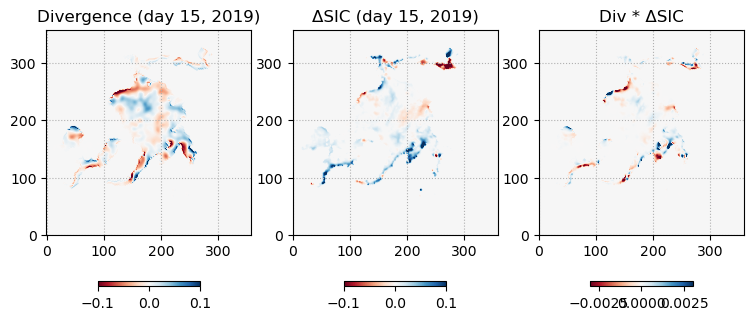

In [111]:
i = 15
fig, ax = plt.subplots(1,3, figsize=(9,4))
im0 = ax[0].imshow(div[i], vmin = -0.1, vmax = 0.1, origin = "lower", cmap = "RdBu")
ax[0].grid(ls = ":")
ax[0].set_title(f"Divergence (day {i}, {year})")
im1 = ax[1].imshow(d_sic[i], vmin = -0.1, vmax = 0.1, origin = "lower", cmap = "RdBu")
ax[1].grid(ls = ":")
ax[1].set_title(f"\u0394SIC (day {i}, {year})")
im2 = ax[2].imshow(pterm[i], vmin = -0.003, vmax = 0.003, origin = "lower", cmap = "RdBu")
ax[2].grid(ls = ":")
ax[2].set_title(f"Div * \u0394SIC")
fig.colorbar(im0, ax = ax[0], orientation='horizontal', shrink = 0.5)
fig.colorbar(im1, ax = ax[1], orientation='horizontal', shrink = 0.5)
fig.colorbar(im2, ax = ax[2], orientation='horizontal', shrink = 0.5)
# plt.colorbar(ax = ax[1])

In [183]:
np.where(np.isnan(cnn_input))

(array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64))

In [175]:
test = np.nanstd(div, axis = (1,2))

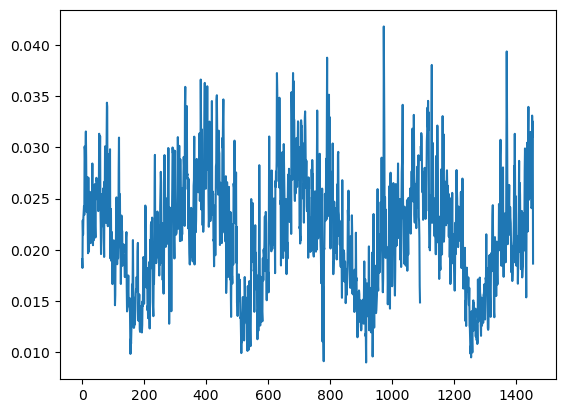

In [176]:
plt.plot(test)

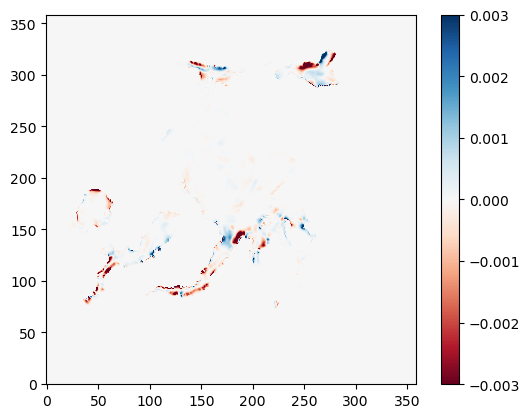

In [164]:
plt.imshow(pterm[i], vmin = -0.003, vmax = 0.003, origin = "lower", cmap = "RdBu")
plt.colorbar()

In [22]:
## Test dataset
first = True

for datatype in ["entire"]:
    n_samples = np.arange(5,10,10)
    
    xx, yy, test_input, test_output = make_dataset(year, n_samples, ds, datatype = datatype)
    # xx, yy, conv_input, conv_output = make_dataset(year, i, ds)

    # if first:
    #     test_input = conv_input
    #     test_output = conv_output
    #     first = False
    # else:
    #     test_input = np.concatenate((train_input, conv_input), axis = 0)
    #     test_output = np.concatenate((train_output, conv_output), axis = 0)
        
    test_save = [xx, yy, test_input, test_output]

    # Open a file and use dump()
    with open('../data/test_{0}_{1}.pkl'.format(datatype, len(n_samples)), 'wb') as file:
        # A new file will be created
        pickle.dump(test_save, file)

    print("Complete creating test data")

1it [00:03,  4.00s/it]

Complete creating test data


In [65]:
with open('../data/train_cell_5.pkl', 'rb') as file:
    xx, yy, train_input, train_output = pickle.load(file)
    
with open('../data/test_cell_1.pkl', 'rb') as file:
    xx, yy, test_input, test_output = pickle.load(file)

    
## Normal CNN (without physical loss)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding = "same", activation='linear', input_shape=np.shape(train_input)[1:]))
# model.add(layers.Conv2D(32, (3, 3), padding = "same", activation='linear'))
# model.add(layers.Conv2D(16, (3, 3), padding = "same", activation='linear'))
# model.add(layers.Conv2D(8, (3, 3), padding = "same", activation='linear'))
model.add(layers.Conv2D(3, (3, 3), padding = "same", activation='linear'))

# model = models.Sequential([
#     tf.keras.layers.Flatten(input_shape=np.shape(train_input)[1:]),
#     tf.keras.layers.Dense(54, activation='relu'),
#     tf.keras.layers.Dense(3)
# ])
# model.add(layers.Dense(32, activation='tanh'))
# model.add(layers.Dense(32, activation='tanh'))
# model.add(layers.Dense(3, activation='tanh'))
model.summary()

# tf.keras.Model(inputs, outputs, name="U-Net")
# unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
#                    loss="sparse_categorical_crossentropy",
#                    metrics="accuracy")

model.compile(optimizer='adam', loss=custom_loss())
model.fit(train_input, train_output, epochs=5, verbose = 1)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 3, 3, 32)          1760      
                                                                 
 conv2d_19 (Conv2D)          (None, 3, 3, 3)           867       
                                                                 
Total params: 2,627
Trainable params: 2,627
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
2917/2917 [==============================] - 5s 1ms/step - loss: 0.0459
Epoch 2/5
2917/2917 [==============================] - 4s 1ms/step - loss: 0.0391
Epoch 3/5
2917/2917 [==============================] - 4s 1ms/step - loss: 0.0379
Epoch 4/5
2917/2917 [==============================] - 4s 1ms/step - loss: 0.0371
Epoch 5/5
2917/2917 [==============================] - 4s 1ms/step - loss: 0.0365


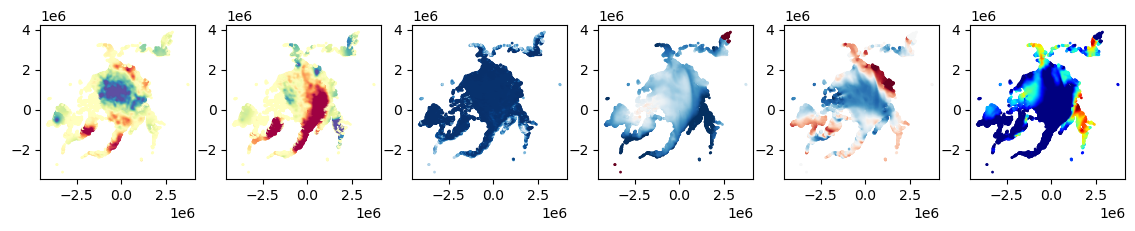

In [66]:
vmax = [10, 10, 100, 10, 10, 0.5]
vmin = [-10, -10, 0, -10, -10, 0]
scaling = [30, 30, 100, 30, 30, 1]
cm = ['Spectral', 'Spectral', 'Blues', 'RdBu', 'RdBu', 'jet']

fig, ax = plt.subplots(1, 6, figsize = (14,2))
for k in range(0, len(ax)):
    ax[k].scatter(xx, yy, c=test_input[:, 1, 1, k]*scaling[k], s=1, vmax = vmax[k], vmin = vmin[k], cmap = cm[k])
    # ax[2, k].scatter(xx, yy, c=test_output[:, 1, 1, k]*scaling[k], s=1, vmax = vmax[k], vmin = vmin[k], cmap = cm[k])

561/561 [==============================] - 0s 706us/step


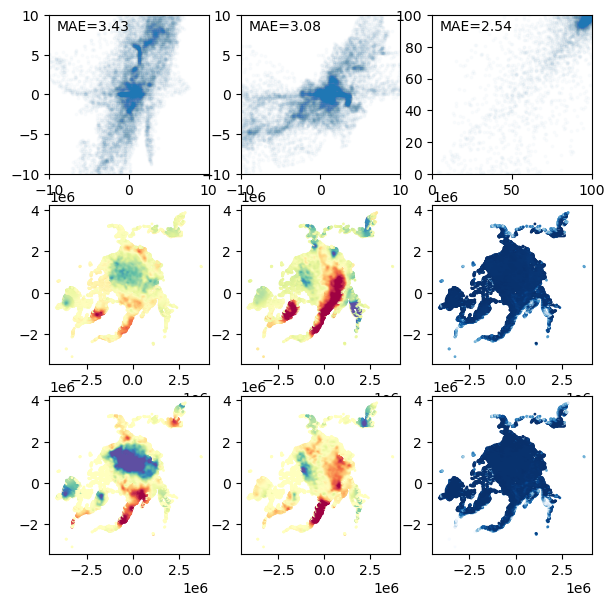

In [67]:
# Cell type visualization -------------------------------
pred = model.predict(test_input)

fig, ax = plt.subplots(3, 3, figsize = (7,7))

vmax = [10, 10, 100]
vmin = [-10, -10, 0]
scaling = [30, 30, 100]
cm = ['Spectral', 'Spectral', 'Blues']

for k in range(0, len(ax)):
    obs = test_output[:, 1, 1, k]*scaling[k]
    prd = pred[:, 1, 1, k]*scaling[k]
    ax[0, k].scatter(prd, obs,  s = 3, alpha = 0.02)
    ax[0, k].text(vmin[k] + (vmax[k]-vmin[k])*0.05, vmax[k] - (vmax[k]-vmin[k])*0.1, "MAE={0:.2f}".format(MAE(obs,prd)))
    ax[0, k].set_xlim(vmin[k], vmax[k])
    ax[0, k].set_ylim(vmin[k], vmax[k])
    # ax[0, k].scatter(, conv_output[:, 1, 1, k], s = 2, alpha = 0.01)
    
    ax[1, k].scatter(xx, yy, c=pred[:, 1, 1, k]*scaling[k], s=1, vmax = vmax[k], vmin = vmin[k], cmap = cm[k])
    ax[2, k].scatter(xx, yy, c=test_output[:, 1, 1, k]*scaling[k], s=1, vmax = vmax[k], vmin = vmin[k], cmap = cm[k])

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding = "same", activation='linear', input_shape=np.shape(train_input)[1:]))
# model.add(layers.Conv2D(32, (3, 3), padding = "same", activation='linear'))
# model.add(layers.Conv2D(16, (3, 3), padding = "same", activation='linear'))
# model.add(layers.Conv2D(8, (3, 3), padding = "same", activation='linear'))
model.add(layers.Conv2D(3, (3, 3), padding = "same", activation='linear'))

# model = models.Sequential([
#     tf.keras.layers.Flatten(input_shape=np.shape(train_input)[1:]),
#     tf.keras.layers.Dense(54, activation='relu'),
#     tf.keras.layers.Dense(3)
# ])
# model.add(layers.Dense(32, activation='tanh'))
# model.add(layers.Dense(32, activation='tanh'))
# model.add(layers.Dense(3, activation='tanh'))
model.summary()

# tf.keras.Model(inputs, outputs, name="U-Net")
# unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
#                    loss="sparse_categorical_crossentropy",
#                    metrics="accuracy")

model.compile(optimizer='adam', loss=physics_loss())
model.fit(train_input, train_output, epochs=5, verbose = 1)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 3, 3, 32)          1760      
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 3)           867       
                                                                 
Total params: 2,627
Trainable params: 2,627
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
2917/2917 [==============================] - 5s 1ms/step - loss: 0.0798
Epoch 2/5
2917/2917 [==============================] - 4s 1ms/step - loss: 0.0589
Epoch 3/5
2917/2917 [==============================] - 4s 1ms/step - loss: 0.0554
Epoch 4/5
2917/2917 [==============================] - 4s 1ms/step - loss: 0.0532
Epoch 5/5
2917/2917 [==============================] - 4s 1ms/step - loss: 0.0535


## Generate CNN input/output (with OBSERVATION DATA)

In [72]:
with open(data_path + '\\train_entire_{0}{1}_v6.pkl'.format(year, str(month).zfill(2)), 'rb') as file:
    xx, yy, input0, output0, samples = pickle.load(file)

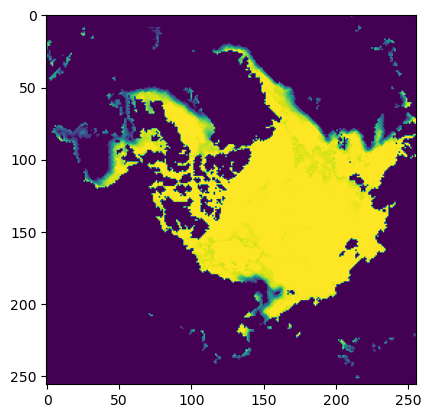

In [74]:
plt.imshow(input0[0, 71:327, 10:266, 2])

In [76]:
xx[71:327, 10:266]

array([[-4261479.25 , -4236411.725, -4211344.2  , ...,  2080604.575,
         2105672.1  ,  2130739.625],
       [-4261479.25 , -4236411.725, -4211344.2  , ...,  2080604.575,
         2105672.1  ,  2130739.625],
       [-4261479.25 , -4236411.725, -4211344.2  , ...,  2080604.575,
         2105672.1  ,  2130739.625],
       ...,
       [-4261479.25 , -4236411.725, -4211344.2  , ...,  2080604.575,
         2105672.1  ,  2130739.625],
       [-4261479.25 , -4236411.725, -4211344.2  , ...,  2080604.575,
         2105672.1  ,  2130739.625],
       [-4261479.25 , -4236411.725, -4211344.2  , ...,  2080604.575,
         2105672.1  ,  2130739.625]])

In [1]:
import math
from typing import Any

In [3]:
years = np.array([], dtype=np.int32)
months = np.array([], dtype=np.int32)
days = np.array([], dtype=np.int32)
first = True

data_path = "D:\\PINN\\data"
year_list = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
# year_list = [2018, 2019, 2020, 2021, 2022]

for year in year_list:
    print(year)
    for month in tqdm([1,2,3,4,5,6,7,8,9,10,11,12]):

        with open(data_path + '\\train_entire_{0}{1}_v7.pkl'.format(year, str(month).zfill(2)), 'rb') as file:
            xx, yy, input0, output0, samples = pickle.load(file)
            n_samples = len(samples)
            
            # Subsetting to 320 x 320
            xx = xx[71:327, 10:266]
            yy = yy[71:327, 10:266]
            input0 = input0[:, 71:327, 10:266, :]
            output0 = output0[:, 71:327, 10:266, :]
            
            # output0[:, :, :, 2] = output0[:, :, :, 2] - input0[:, :, :, 2]

        if first:
            cnn_input = input0
            cnn_output = output0
            first = False
        else:
            cnn_input = np.concatenate((cnn_input, input0))
            cnn_output = np.concatenate((cnn_output, output0))
            
        del input0, output0

        days = np.concatenate((days, samples + 1))
        months = np.concatenate((months, np.ones(n_samples) * month))
        years = np.concatenate((years, np.ones(n_samples) * year))

cnn_save = [xx, yy, days, months, years, cnn_input.astype(np.float16), cnn_output.astype(np.float16)]

    # Open a file and use dump()
with open(f'../data/train_cnn_{year_list[0]}_{year_list[-1]}_v7.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(cnn_save, file)

2016


100%|██████████████████████████████████████████████████████████████████████████████| 12/12 [01:02<00:00,  5.19s/it]


2017


100%|██████████████████████████████████████████████████████████████████████████████| 12/12 [01:07<00:00,  5.59s/it]


2018


100%|██████████████████████████████████████████████████████████████████████████████| 12/12 [01:09<00:00,  5.80s/it]


2019


100%|██████████████████████████████████████████████████████████████████████████████| 12/12 [01:15<00:00,  6.26s/it]


2020


100%|██████████████████████████████████████████████████████████████████████████████| 12/12 [01:18<00:00,  6.54s/it]


2021


100%|██████████████████████████████████████████████████████████████████████████████| 12/12 [01:26<00:00,  7.18s/it]


2022


100%|██████████████████████████████████████████████████████████████████████████████| 12/12 [01:51<00:00,  9.25s/it]


## Generate CNN input/output (with PHYSICS MODEL HYCOM DATA)

In [26]:
data_path = "D:\\PINN\\data"
year_list = [2018, 2019, 2020, 2021, 2022]

# Grid initialization (for resample to 20 km)
cell = 25000
xstart, xend = -3200000, 3200000
ystart, yend = -3900000, 2500000

xx2 = np.arange(xstart, xend, cell)
yy2 = np.arange(ystart, yend, cell)

for year in year_list:
    
    years = np.array([], dtype=np.int32)
    months = np.array([], dtype=np.int32)
    days = np.array([], dtype=np.int32)
    
    print(year)
    
    first = True
    
    for month in tqdm([1,2,3,4,5,6,7,8,9,10,11,12]):

        with open(data_path + '\\train_physics_entire_{0}{1}_v1.pkl'.format(year, str(month).zfill(2)), 'rb') as file:
            xx, yy, input0, output0, samples = pickle.load(file)
            
            n_samples, row, col, in_channels = np.shape(input0)
            _, _, _, out_channels = np.shape(output0)

            input1 = np.zeros([n_samples, len(xx2), len(yy2), in_channels])
            output1 = np.zeros([n_samples, len(xx2), len(yy2), out_channels])

            for i in range(0, len(xx2)):
                for j in range(0, len(yy2)):
                    xind, yind = lookupNearest(xx2[i], yy2[j], xx[0, :], yy[:, 0])
                    input1[:, j, i, :] = input0[:, yind, xind, :]
                    output1[:, j, i, :] = output0[:, yind, xind, :]
                    # input1[:, j, i, :] = np.mean(input0[:, yind:yind+2, xind:xind+2, :], axis = (1,2))
                    # output1[:, j, i, :] = np.mean(output0[:, yind:yind+2, xind:xind+2, :], axis = (1,2))
                    
            del input0, output0
                    
        if first:
            cnn_input = input1
            cnn_output = output1
            first = False
        else:
            cnn_input = np.concatenate((cnn_input, input1))
            cnn_output = np.concatenate((cnn_output, output1))
            
        del input1, output1

        days = np.concatenate((days, samples + 1))
        months = np.concatenate((months, np.ones(n_samples) * month))
        years = np.concatenate((years, np.ones(n_samples) * year))
        
    cnn_save = [xx2, yy2, days, months, years, cnn_input.astype(np.float16), cnn_output.astype(np.float16)]

    # Open a file and use dump()
    with open(f'../data/train_physics_{year}_v1.pkl', 'wb') as file:
        # A new file will be created
        pickle.dump(cnn_save, file)

2018


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [04:18<00:00, 21.55s/it]


2019


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [04:17<00:00, 21.49s/it]


2020


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [04:21<00:00, 21.83s/it]


2021


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [04:22<00:00, 21.84s/it]


2022


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [04:21<00:00, 21.82s/it]


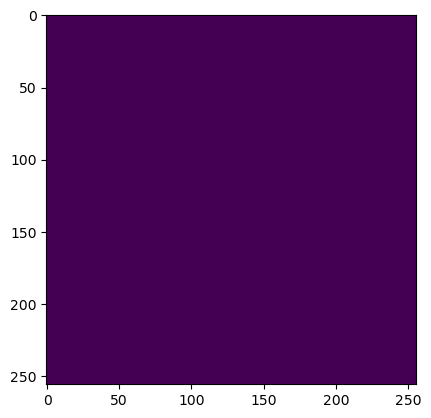

In [90]:
plt.imshow(cnn_output[0, :, :, 3])

In [11]:
data_path = "D:\\PINN\\data"
year_list = [2019, 2020, 2021, 2022]

# Grid initialization (for resample to 20 km)
cell = 25000
xstart, xend = -3200000, 3200000
ystart, yend = -3900000, 2500000

xx2 = np.arange(xstart, xend, cell)
yy2 = np.arange(ystart, yend, cell)

for year in year_list:
    
    years = np.array([], dtype=np.int32)
    months = np.array([], dtype=np.int32)
    days = np.array([], dtype=np.int32)
    
    print(year)
    
    first = True
    
    for month in tqdm([1,2,3,4,5,6,7,8,9,10,11,12]):

        with open(data_path + '\\train_cice_entire_{0}{1}_v1.pkl'.format(year, str(month).zfill(2)), 'rb') as file:
            xx, yy, input0, output0, samples = pickle.load(file)
            
            n_samples, row, col, in_channels = np.shape(input0)
            _, _, _, out_channels = np.shape(output0)

            input1 = np.zeros([n_samples, len(xx2), len(yy2), in_channels])
            output1 = np.zeros([n_samples, len(xx2), len(yy2), out_channels])

            for i in range(0, len(xx2)):
                for j in range(0, len(yy2)):
                    xind, yind = lookupNearest(xx2[i], yy2[j], xx[0, :], yy[:, 0])
                    input1[:, j, i, :] = input0[:, yind, xind, :]
                    output1[:, j, i, :] = output0[:, yind, xind, :]
                    # input1[:, j, i, :] = np.mean(input0[:, yind:yind+2, xind:xind+2, :], axis = (1,2))
                    # output1[:, j, i, :] = np.mean(output0[:, yind:yind+2, xind:xind+2, :], axis = (1,2))
                    
            del input0, output0
                    
        if first:
            cnn_input = input1
            cnn_output = output1
            first = False
        else:
            cnn_input = np.concatenate((cnn_input, input1))
            cnn_output = np.concatenate((cnn_output, output1))
            
        del input1, output1

        days = np.concatenate((days, samples + 1))
        months = np.concatenate((months, np.ones(n_samples) * month))
        years = np.concatenate((years, np.ones(n_samples) * year))
        
    cnn_save = [xx2, yy2, days, months, years, cnn_input.astype(np.float16), cnn_output.astype(np.float16)]

    # Open a file and use dump()
    with open(f'../data/train_cice_{year}_v1.pkl', 'wb') as file:
        # A new file will be created
        pickle.dump(cnn_save, file)

2019


100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [01:06<00:00,  5.51s/it]


2020


100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [01:07<00:00,  5.66s/it]


2021


100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [01:11<00:00,  5.93s/it]


2022


100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [01:12<00:00,  6.07s/it]


In [25]:
with open(f'../data/train_cice_{year}_v1.pkl', 'r') as file:
    # A new file will be created
    pickle.dump(cnn_save, file)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [34]:
# Merge all year data
years = np.array([], dtype=np.int32)
months = np.array([], dtype=np.int32)
days = np.array([], dtype=np.int32)

year_list = [2019, 2020, 2021, 2022]
first = True

for year in year_list:
    print(year)

    with open(f'../data/train_cice_{year}_v1.pkl', 'rb') as file:
        xx, yy, day0, month0, year0, input0, output0 = pickle.load(file)
        for c in [0, 1, 5, 6]: # Change U,V range into [0,1]
            input0[:, :, :, c] = input0[:, :, :, c]
        for c in [0, 1]:
            output0[:, :, :, c] = output0[:, :, :, c]

    if first:
        cnn_input = input0
        cnn_output = output0
        first = False
    else:
        cnn_input = np.concatenate((cnn_input, input0))
        cnn_output = np.concatenate((cnn_output, output0))
        
    days = np.concatenate((days, day0))
    months = np.concatenate((months, month0))
    years = np.concatenate((years, year0))

xx2, yy2 = np.meshgrid(xx, yy)
cnn_save = [xx2, yy2, days, months, years, cnn_input.astype(np.float16), cnn_output.astype(np.float16)]

with open(f'../data/train_cice_{year_list[0]}_{year_list[-1]}_v1.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(cnn_save, file)

2019
2020
2021
2022


In [54]:
with open(f'../data/train_cice_2019_2022_v1.pkl', 'rb') as file:
    xx2, yy2, days, months, years, cnn_input, cnn_output = pickle.load(file)

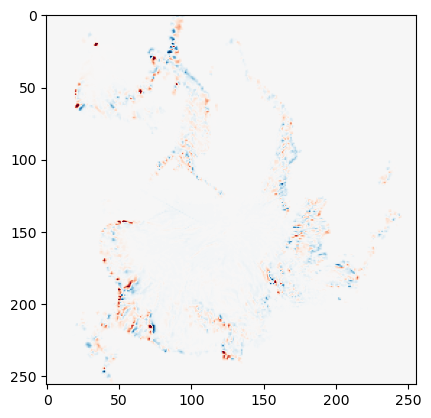

In [64]:
plt.imshow(cnn_input[101, :, :, 3] - cnn_input[100, :, :, 3], vmin = -0.1, vmax = 0.1, cmap = "RdBu")

In [35]:
with open(f'../data/train_cice_2019_2022_v1.pkl', 'rb') as file:
    xx2, yy2, days, months, years, cnn_input, cnn_output = pickle.load(file)

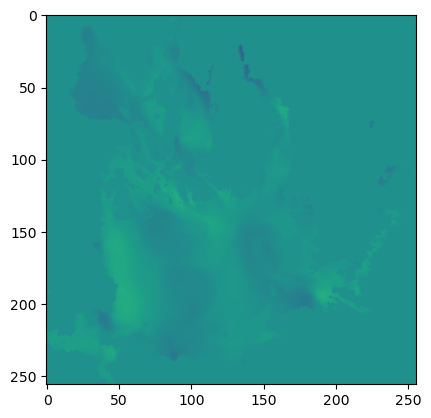

In [43]:
plt.imshow(cnn_input[0, :, :, 6], vmin = -1, vmax = 1)

In [36]:
cnn_input, cnn_output, days, months, years = convert_cnn_input2D(cnn_input, cnn_output, days, months, years, 3, 1)

In [27]:
plt.imshow(cnn_input[0, :, :, 7], vmin = -1, vmax = 1, cmap = "RdBu")

IndexError: index 7 is out of bounds for axis 3 with size 7

In [145]:
a = np.mean(cnn_input, axis=(1,2))

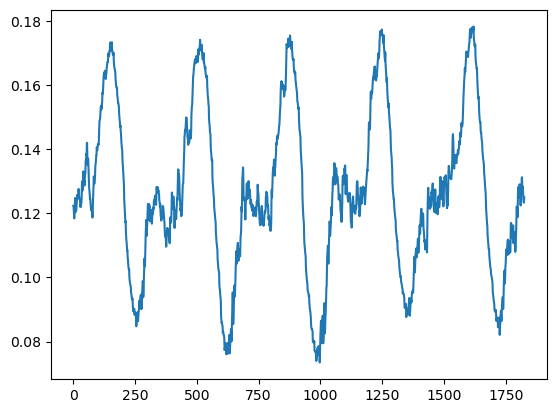

In [146]:
plt.plot(a[:, 4])

In [147]:
xx2.shape

(256, 256)

In [5]:
del cnn_input, cnn_output, cnn_save

In [34]:
batch_start = np.arange(0, 100)
with tqdm(batch_start, unit="batch", mininterval=0, disable=False) as bar:
    bar.set_description(f"Epoch")
    for start in bar:
        pass

Epoch: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 936.56batch/s]


In [3]:
import os
os.environ.get("SLURM_NODEID")

In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [8]:
cnn_input1 = cnn_input.astype(np.float16)

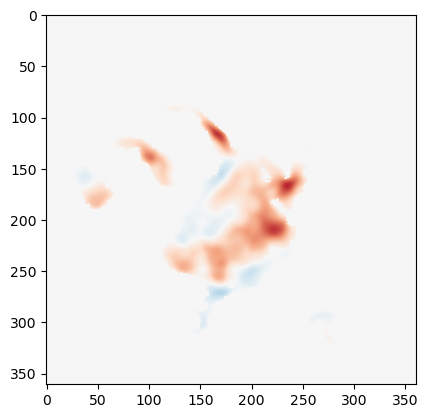

In [113]:
plt.imshow(train_input[20, :, :, 0], vmin = -0.5, vmax = 0.5, cmap = "RdBu")

## Landmask

In [16]:
ncfile = "D:\\PINN\\data\\NH\\Sea_ice_drift\\icemotion_daily_nh_25km_20120101_20121231_v4.1.nc"
with netCDF4.Dataset(ncfile, 'r') as nc:
    # sic = np.array(nc.variables['cdr_seaice_conc'])[0] # CDR SIC
    xs = np.array(nc.variables['x'])[:]
    ys = np.array(nc.variables['y'])[:] 
    xx, yy = np.meshgrid(xs, ys)

In [46]:
landmask3.dtype

dtype('bool')

In [59]:
ncfile = "D:\\PINN\\data\\NH\\SIC_NOAA\\seaice_conc_daily_nh_20130103_f17_v04r00.nc"
with netCDF4.Dataset(ncfile, 'r') as nc:
    sic = np.array(nc.variables['cdr_seaice_conc'])[0] # CDR SIC
    xx0 = np.array(nc.variables['xgrid'])
    yy0 = np.array(nc.variables['ygrid'])
    
    landmask = (sic > 1)
    
    inProj = Proj('epsg:3411')
    outProj = Proj('epsg:3408')
   
    xx1, yy1 = np.meshgrid(xx0, yy0)
    xx2,yy2 = transform(inProj,outProj,xx1,yy1)
    landmask2 = griddata((xx2.flatten(), yy2.flatten()), landmask.flatten(), (xx, yy), method='linear')
    landmask3 = (landmask2 != 0)[41:, :-41]
    
    with open(f'../data/landmask_320.pkl', 'wb') as file:
    # A new file will be created
        pickle.dump(landmask3, file)
    

In [57]:
torch.tensor(landmask)

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [50]:
landmask3.shape, landmask.dtype

((320, 320), dtype('bool'))

In [53]:
with open(f"../data/landmask_320.pkl", 'rb') as file:
    landmask = pickle.load(file)
    
landmask.dtype

dtype('bool')

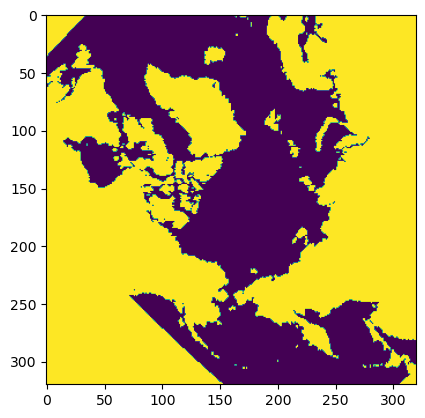

In [61]:
plt.imshow(landmask3)
# plt.xlim(0,100)
# plt.ylim(50, 150)

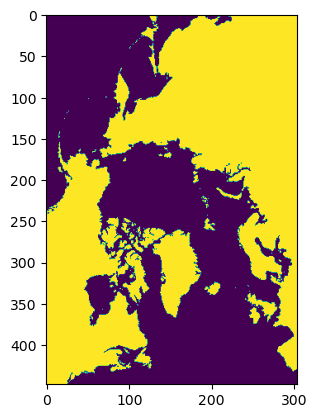

In [60]:
plt.imshow(landmask)
# plt.xlim(0,100)
# plt.ylim(50, 150)

## Create LSTM input/output

In [2]:
with open(data_path + '/train_cnn_2019_2021.pkl', 'rb') as file:
    xx, yy, days, months, years, cnn_input, cnn_output = pickle.load(file)

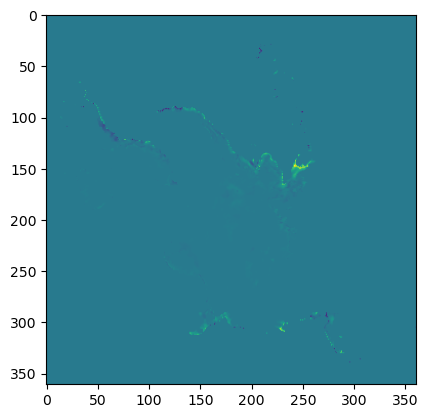

In [7]:
plt.imshow(cnn_output[0, :, :, 2])

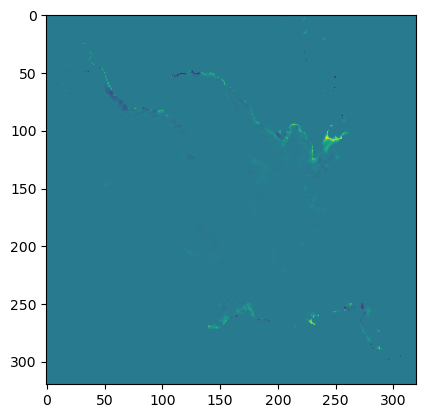

In [8]:
plt.imshow(cnn_output[0, 41:, :-41, 2])

In [5]:
np.shape(cnn_output)

(1093, 361, 361, 3)

In [ ]:
# data_path = "D:\\PINN\\data"

# with open(data_path + '/train_cnn_2019_2021.pkl', 'rb') as file:
#     xx, yy, days, months, years, cnn_input, cnn_output = pickle.load(file)

day_lag = 7

for year in [2019, 2020, 2021]:
    idx = (years == year)
    inputs = cnn_input[idx, :, :, :]
    outputs = cnn_output[idx, :, :, :]
    print(np.shape(inputs), np.shape(outputs))
    
    lstm_input, lstm_output = make_lstm_input2D(inputs, outputs, days = day_lag)
    print("######## TRAINING DATA IS PREPARED (# of samples: {0}) ########".format(day_lag))
    
    lstm_input = np.transpose(lstm_input, (0, 1, 4, 2, 3))
    lstm_output = np.transpose(lstm_output, (0, 1, 4, 2, 3))

    days1 = days[idx][day_lag:]
    months1 = months[idx][day_lag:]
    years1 = years[idx][day_lag:]
    
    print(np.shape(lstm_input), np.shape(lstm_output), np.shape(days1), np.shape(months1), np.shape(years1))

    train_save = [xx, yy, days1, months1, years1, lstm_input.astype(np.float16), lstm_output.astype(np.float16)]

    # Open a file and use dump()
    with open(data_path + f'/train_lstm_{day_lag}days_{year}.pkl', 'wb') as file:
        # A new file will be created
        pickle.dump(train_save, file)

In [22]:
a = np.transpose(cnn_input, (0, 3, 1, 2))

In [27]:
b = np.transpose(lstm_input, (0, 1, 4, 2, 3))

In [28]:
np.shape(b), np.shape(lstm_input)

((357, 7, 6, 320, 320), (357, 7, 320, 320, 6))

In [23]:
np.shape(a), np.shape(cnn_input)

((1093, 6, 361, 361), (1093, 361, 361, 6))

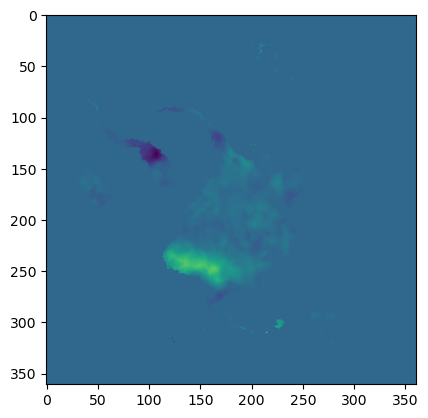

In [24]:
plt.imshow(cnn_input[0, :, :, 0])

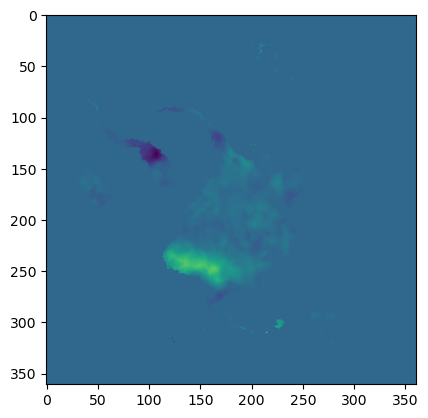

In [25]:
plt.imshow(a[0, 0, :, :])

In [16]:
np.shape(lstm_input), np.shape(lstm_output)

((357, 7, 320, 320, 6), (357, 320, 320, 3))

In [20]:
len(months[idx][day_lag:])

357

## Read sea ice model data

In [5]:
from urllib.request import urlretrieve

date = "2022-01-03"
with f"https://ncss.hycom.org/thredds/ncss/GLBy0.08/expt_93.0/ice?var=sic&var=sih&var=siu&var=siv&maxy=90&minx=0&maxx=360&miny=50&horizStride=1&time={date}&addLatLon=true&accept=netcdf4" as url:
    data_path = "D:\\PINN\\data\\NH\\CICE\\"
    filename = f"CICE_{date}.nc"
    urlretrieve(url, data_path + filename);

In [19]:
from urllib.request import urlretrieve

for year in range(2019, 2023):
    days = dt.datetime(year, 12, 31).timetuple().tm_yday

    for i in tqdm(range(1, days+1)):
        date = dt.datetime.strptime(str(year) + str(i).zfill(3), "%Y%j").strftime("%Y-%m-%d")
        # print(date)
        try:
            url = f"https://ncss.hycom.org/thredds/ncss/GLBy0.08/expt_93.0/ice?var=sic&var=sih&var=siu&var=siv&maxy=90&minx=0&maxx=360&miny=50&horizStride=8&time={date}&addLatLon=true&accept=netcdf4"
            data_path = "D:\\PINN\\data\\NH\\CICE\\"
            filename = f"CICE_{date}.nc"
            urlretrieve(url, data_path + filename);
        except:
            pass

100%|████████████████████████████████████████████████████████████████████████████████| 365/365 [29:12<00:00,  4.80s/it]


In [2]:
# Import Module
import ftplib

In [18]:
# Import Module
import ftplib

# ftp://my.cmems-du.eu/Core/ARCTIC_MULTIYEAR_PHY_002_003/cmems_mod_arc_phy_my_topaz4_P1D-m

# Fill Required Information
HOSTNAME = "ftp://my.cmems-du.eu"
USERNAME = "ykoo"
PASSWORD = "YHch9245"

ftp_url = 'ftp://nrt.cmems-du.eu';  

productID = 'GLOBAL_ANALYSISFORECAST_PHY_001_024/';  
datasetID = 'cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m/';

year = '2022';
month = '01';
day = '01';

 
# Connect FTP Server
ftp_server = ftplib.FTP(HOSTNAME, USERNAME, PASSWORD)
 
# # force UTF-8 encoding
# ftp_server.encoding = "utf-8"
 
# # # Enter File Name with Extension
filename = "/Core/ARCTIC_MULTIYEAR_PHY_002_003/cmems_mod_arc_phy_my_topaz4_P1D-m/2022/08/20220829_dm-12km-NERSC-MODEL-TOPAZ4B-ARC-RAN.fv2.0.nc"

# strname = os.path.basename(filename)

# # # Read file in binary mode
# with open(filename, "rb") as file:
#     # Command for Uploading the file "STOR filename"
#     ftp_server.storbinary(f"{strname}", file)

# ftp_server.dir()
 
# # Close the Connection
# ftp_server.quit()

gaierror: [Errno 11001] getaddrinfo failed

In [ ]:
/Core/ARCTIC_MULTIYEAR_PHY_002_003/cmems_mod_arc_phy_my_topaz4_P1D-m

In [14]:
ftp_server.dir()

drwxr-xr-x  186 ftp      ftp             0 Jul 05 09:24 Core
